In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q keras

In [3]:
import keras

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
dir = 'datasets'

catagories = ['Corn___Common_Rust','Corn___Gray_Leaf_Spot','Corn___Healthy','Corn___Northern_Leaf_Blight','Potato___Early_Blight',
				'Potato___Healthy', 'Potato___Late_Blight','Rice___Brown_Spot','Rice___Healthy','Rice___Leaf_Blast','Rice___Neck_Blast',
				'Wheat___Brown_Rust','Wheat___Healthy','Wheat___Yellow_Rust']


In [6]:
from skimage import color
from skimage import io
data = []

path = '/content/drive/MyDrive/datasets'

for category in catagories:
    
    path2 = os.path.join(path , category)
    label = catagories.index(category)
    
    for img in os.listdir(path2):
        
        imgpath = os.path.join(path2,img)
        draw_img = cv2.imread(imgpath,0)

        try:
            draw_img = cv2.resize(draw_img,(32,32))
            image = np.array(draw_img).flatten()

            data.append([image, label])
        except Exception as e:
            pass
        # break
    # break
print(len(data))
print(data)

13024
[[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([  0,   0,   0, ..., 107,  97,   0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([0, 0, 0, ..., 4, 0, 0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([  0,   0,   0, ..., 182,   0,   0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([ 0,  0, 67, ...,  0,  0,  0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([ 0,  0, 73, ...,  0,  0,  0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([  0,   0,   0, ..., 137,  76,   0], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0], [array([1, 1, 1, ..., 1, 1, 1], dtype=uint8), 0], [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),

In [7]:
features = []
labels = []

for feature , label in data:
    features.append(feature)
    labels.append(label)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(features,labels,test_size = 0.35,stratify=labels)

In [ ]:
model = SVC(C=1, kernel='poly',gamma = 'auto')
model.fit(xtrain,ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/SVC', 'wb'))
 
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [ ]:
print('Accuracy for SVM is : ',model.score(xtest,ytest))
print('\n')

print('Report for SVM:\n')
pred=model.predict(xtest)
x=classification_report(ytest,pred,output_dict=True)
xn=classification_report(ytest,pred)

print(xn)

Accuracy for SVM is :  0.5352050888352708


Report for SVM:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       417
           1       0.24      0.34      0.28       179
           2       0.43      0.66      0.52       407
           3       0.40      0.48      0.43       345
           4       0.74      0.72      0.73       350
           5       0.25      0.26      0.26        53
           6       0.68      0.79      0.73       350
           7       0.28      0.41      0.33       215
           8       0.61      0.56      0.59       521
           9       0.38      0.41      0.40       342
          10       0.87      0.67      0.76       350
          11       0.23      0.23      0.23       316
          12       0.63      0.21      0.32       391
          13       0.54      0.27      0.36       323

    accuracy                           0.54      4559
   macro avg       0.52      0.50      0.49      4559
weighted avg       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.966507,0.242915,0.429487,0.399027,0.736070,0.250000,0.676471,0.277603,0.609959,0.384615,0.874074,0.225610,0.631579,0.543750,0.535205,0.517690,0.564911
recall,0.968825,0.335196,0.658477,0.475362,0.717143,0.264151,0.788571,0.409302,0.564299,0.409357,0.674286,0.234177,0.214834,0.269350,0.535205,0.498809,0.535205
f1-score,0.967665,0.281690,0.519884,0.433862,0.726483,0.256881,0.728232,0.330827,0.586241,0.396601,0.761290,0.229814,0.320611,0.360248,0.535205,0.492881,0.533224
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.535205,4559.000000,4559.000000


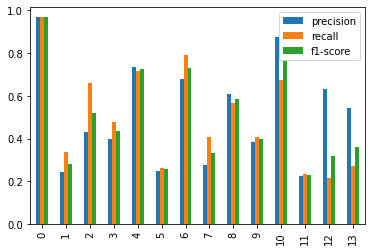

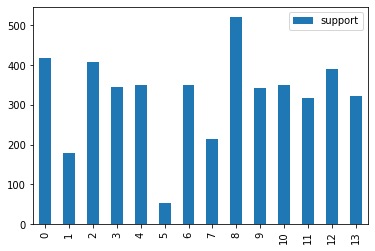

In [ ]:
import pandas as pd
from IPython import display
display.display(pd.DataFrame(x))
df = pd.DataFrame(x)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

In [ ]:
model2=RandomForestClassifier(criterion="entropy")
model2.fit(np.array(xtrain),np.array(ytrain))
pickle.dump(model2, open('/content/drive/MyDrive/RF', 'wb'))
print('Accuracy for RF is : ',model2.score(np.array(xtest),np.array(ytest)))
print('\n')

print('Report for RF:\n')
preds=model2.predict(np.array(xtest))
x2=classification_report(ytest,preds,output_dict=True)
x2n=classification_report(np.array(ytest),preds)

print(x2n)


Accuracy for RF is :  0.6968633472252687


Report for RF:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       0.60      0.05      0.09       179
           2       0.63      0.73      0.68       407
           3       0.55      0.83      0.66       345
           4       0.74      0.88      0.81       350
           5       1.00      0.02      0.04        53
           6       0.75      0.84      0.79       350
           7       0.75      0.46      0.57       215
           8       0.66      0.90      0.76       521
           9       0.59      0.36      0.45       342
          10       0.86      0.91      0.89       350
          11       0.48      0.28      0.35       316
          12       0.68      0.74      0.71       391
          13       0.60      0.55      0.58       323

    accuracy                           0.70      4559
   macro avg       0.71      0.61      0.60      4559
weighted avg       0.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,1.000000,0.600000,0.627368,0.545802,0.744578,1.000000,0.751282,0.750000,0.660085,0.594203,0.864865,0.478261,0.680751,0.601351,0.696863,0.707039,0.694715
recall,0.995204,0.050279,0.732187,0.828986,0.882857,0.018868,0.837143,0.460465,0.898273,0.359649,0.914286,0.278481,0.741688,0.551084,0.696863,0.610675,0.696863
f1-score,0.997596,0.092784,0.675737,0.658228,0.807843,0.037037,0.791892,0.570605,0.760976,0.448087,0.888889,0.352000,0.709914,0.575121,0.696863,0.597622,0.670030
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.696863,4559.000000,4559.000000


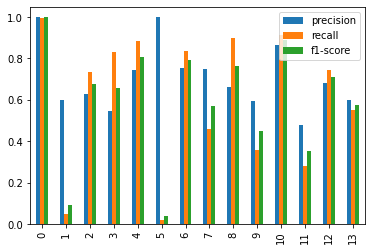

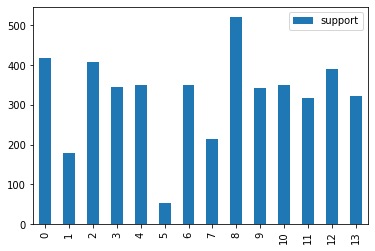

In [ ]:
import pandas as pd
from IPython import display
display.display(pd.DataFrame(x2))
df = pd.DataFrame(x2)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

In [ ]:
model3=KNeighborsClassifier(n_neighbors=1)
model3.fit(np.array(xtrain),np.array(ytrain))
pickle.dump(model3, open('/content/drive/MyDrive/KNN', 'wb'))
print('Accuracy for NN is : ',model3.score(np.array(xtest),np.array(ytest)))
print('\n')

print('Report for NN:\n')
preds=model3.predict(np.array(xtest))
x3=classification_report(ytest,preds,output_dict=True)
x3n=classification_report(np.array(ytest),preds)

print(x3n)

Accuracy for NN is :  0.46654968194779556


Report for NN:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       417
           1       0.20      0.21      0.20       179
           2       0.29      0.77      0.42       407
           3       0.27      0.41      0.32       345
           4       0.98      0.23      0.37       350
           5       0.39      0.25      0.30        53
           6       0.55      0.84      0.67       350
           7       0.38      0.45      0.42       215
           8       0.59      0.64      0.61       521
           9       0.41      0.47      0.44       342
          10       0.99      0.61      0.75       350
          11       0.19      0.19      0.19       316
          12       0.67      0.01      0.01       391
          13       0.00      0.00      0.00       323

    accuracy                           0.47      4559
   macro avg       0.49      0.43      0.40      4559
weighted avg       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,1.000000,0.201087,0.291862,0.268431,0.975904,0.393939,0.550373,0.384921,0.591474,0.406566,0.986047,0.193651,0.666667,0.0,0.46655,0.493637,0.530030
recall,0.913669,0.206704,0.766585,0.411594,0.231429,0.245283,0.842857,0.451163,0.639155,0.470760,0.605714,0.193038,0.005115,0.0,0.46655,0.427362,0.466550
f1-score,0.954887,0.203857,0.422764,0.324943,0.374134,0.302326,0.665914,0.415418,0.614391,0.436314,0.750442,0.193344,0.010152,0.0,0.46655,0.404920,0.435456
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.0,0.46655,4559.000000,4559.000000


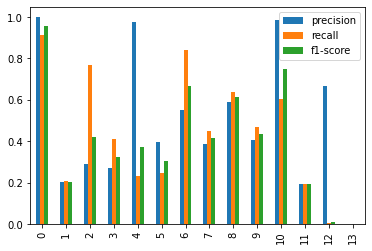

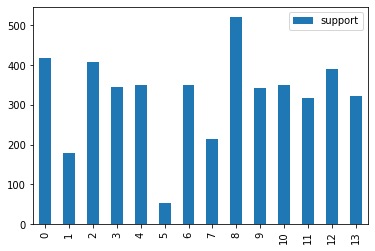

In [ ]:
import pandas as pd
from IPython import display
display.display(pd.DataFrame(x3))
df = pd.DataFrame(x3)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

Accuracy for MNB is :  0.7109015134898004


Report for MNB:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       417
           1       0.71      0.07      0.12       179
           2       0.67      0.74      0.70       407
           3       0.55      0.86      0.67       345
           4       0.78      0.91      0.84       350
           5       1.00      0.02      0.04        53
           6       0.77      0.86      0.81       350
           7       0.73      0.43      0.54       215
           8       0.65      0.88      0.75       521
           9       0.59      0.37      0.45       342
          10       0.89      0.94      0.91       350
          11       0.52      0.28      0.36       316
          12       0.71      0.81      0.76       391
          13       0.62      0.55      0.58       323

    accuracy                           0.71      4559
   macro avg       0.73      0.62      0.61      4559
weighted avg       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.997590,0.705882,0.667401,0.545120,0.783784,1.000000,0.767857,0.730159,0.649296,0.588785,0.887097,0.517442,0.711409,0.619377,0.710902,0.726514,0.712211
recall,0.992806,0.067039,0.744472,0.857971,0.911429,0.018868,0.860000,0.427907,0.884837,0.368421,0.942857,0.281646,0.813299,0.554180,0.710902,0.623266,0.710902
f1-score,0.995192,0.122449,0.703833,0.666667,0.842801,0.037037,0.811321,0.539589,0.748985,0.453237,0.914127,0.364754,0.758950,0.584967,0.710902,0.610279,0.683575
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.710902,4559.000000,4559.000000


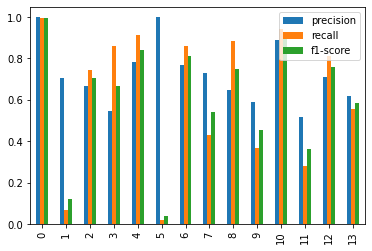

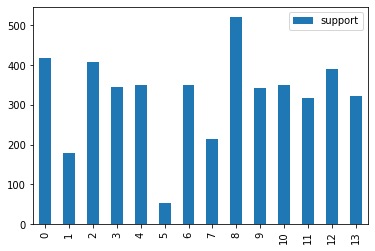

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model4=ExtraTreesClassifier()
model4.fit(np.array(xtrain),np.array(ytrain))
pickle.dump(model4, open('/content/drive/MyDrive/MNB', 'wb'))
print('Accuracy for MNB is : ',model4.score(np.array(xtest),np.array(ytest)))
print('\n')

print('Report for MNB:\n')
preds=model4.predict(np.array(xtest))
x4=classification_report(ytest,preds,output_dict=True)
x4n=classification_report(np.array(ytest),preds)

print(x4n)
import pandas as pd
from IPython import display
display.display(pd.DataFrame(x4))
df = pd.DataFrame(x4)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

model5

Accuracy for RF is :  0.48058784821232725


Report DT:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       417
           1       0.17      0.18      0.17       179
           2       0.41      0.47      0.44       407
           3       0.42      0.42      0.42       345
           4       0.51      0.53      0.52       350
           5       0.15      0.15      0.15        53
           6       0.60      0.55      0.57       350
           7       0.31      0.39      0.34       215
           8       0.60      0.58      0.59       521
           9       0.35      0.39      0.37       342
          10       0.70      0.66      0.68       350
          11       0.19      0.19      0.19       316
          12       0.47      0.36      0.41       391
          13       0.29      0.27      0.28       323

    accuracy                           0.48      4559
   macro avg       0.44      0.44      0.43      4559
weighted avg       0.49 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.943262,0.167539,0.412527,0.423977,0.509695,0.145455,0.596923,0.307407,0.597250,0.353887,0.704268,0.185185,0.473333,0.291525,0.480588,0.436588,0.485866
recall,0.956835,0.178771,0.469287,0.420290,0.525714,0.150943,0.554286,0.386047,0.583493,0.385965,0.660000,0.189873,0.363171,0.266254,0.480588,0.435066,0.480588
f1-score,0.950000,0.172973,0.439080,0.422125,0.517581,0.148148,0.574815,0.342268,0.590291,0.369231,0.681416,0.187500,0.410999,0.278317,0.480588,0.434625,0.481990
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.480588,4559.000000,4559.000000


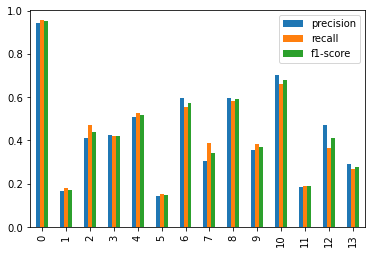

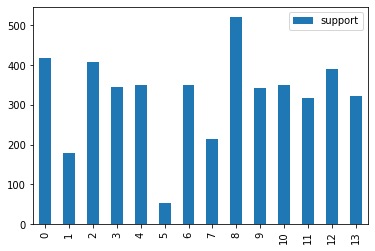

In [15]:
model5=DecisionTreeClassifier()
model5.fit(np.array(xtrain),np.array(ytrain))
pickle.dump(model5, open('/content/drive/MyDrive/DecsionTree', 'wb'))
print('Accuracy for RF is : ',model5.score(np.array(xtest),np.array(ytest)))
print('\n')

print('Report DT:\n')
preds=model5.predict(np.array(xtest))
x5=classification_report(ytest,preds,output_dict=True)
x5d=classification_report(np.array(ytest),preds)
print(x5d)

import pandas as pd
from IPython import display
display.display(pd.DataFrame(x5))
df = pd.DataFrame(x5)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

Accuracy for GaussNB is :  0.5964027198947137


Report NB:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       417
           1       0.26      0.25      0.25       179
           2       0.46      0.51      0.48       407
           3       0.52      0.70      0.60       345
           4       0.81      0.70      0.75       350
           5       0.28      0.64      0.39        53
           6       0.83      0.62      0.71       350
           7       0.25      0.30      0.27       215
           8       0.57      0.57      0.57       521
           9       0.35      0.27      0.30       342
          10       0.72      0.77      0.74       350
          11       0.36      0.23      0.28       316
          12       0.75      0.90      0.82       391
          13       0.65      0.62      0.63       323

    accuracy                           0.60      4559
   macro avg       0.56      0.57      0.55      4559
weighted avg       0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.969849,0.261905,0.461197,0.521739,0.809211,0.276423,0.825095,0.248092,0.570600,0.348485,0.717333,0.363184,0.748401,0.654605,0.596403,0.555437,0.602187
recall,0.925659,0.245810,0.511057,0.695652,0.702857,0.641509,0.620000,0.302326,0.566219,0.269006,0.768571,0.231013,0.897698,0.616099,0.596403,0.570963,0.596403
f1-score,0.947239,0.253602,0.484848,0.596273,0.752294,0.386364,0.707993,0.272537,0.568401,0.303630,0.742069,0.282398,0.816279,0.634769,0.596403,0.553478,0.593716
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.596403,4559.000000,4559.000000


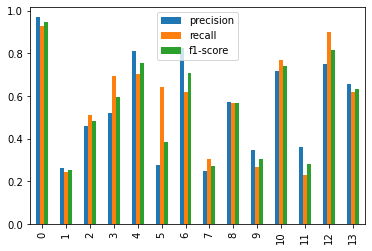

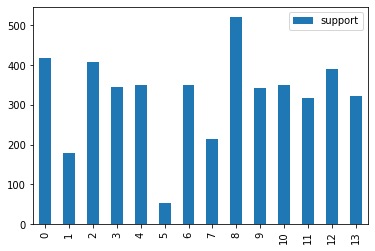

In [ ]:
model7=GaussianNB()
model7.fit(np.array(xtrain),np.array(ytrain))
pickle.dump(model7, open('/content/drive/MyDrive/GaussNB', 'wb'))
print('Accuracy for GaussNB is : ',model7.score(np.array(xtest),np.array(ytest)))

print('\n')

print('Report NB:\n')
preds=model7.predict(np.array(xtest))
x7=classification_report(ytest,preds,output_dict=True)
x7g=classification_report(np.array(ytest),preds)
print(x7g)


import pandas as pd
from IPython import display
display.display(pd.DataFrame(x7))
df = pd.DataFrame(x7)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

In [9]:
from sklearn.ensemble import BaggingClassifier


Accuracy for BaggingClass is :  0.6108795788550121


Report for BaggingClass:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       417
           1       0.23      0.22      0.23       179
           2       0.54      0.70      0.61       407
           3       0.51      0.62      0.56       345
           4       0.66      0.77      0.71       350
           5       0.00      0.00      0.00        53
           6       0.71      0.71      0.71       350
           7       0.56      0.45      0.50       215
           8       0.64      0.77      0.70       521
           9       0.51      0.39      0.44       342
          10       0.82      0.83      0.82       350
          11       0.32      0.26      0.28       316
          12       0.63      0.51      0.57       391
          13       0.45      0.35      0.39       323

    accuracy                           0.61      4559
   macro avg       0.54      0.54      0.54      4559
w

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.976359,0.233918,0.543021,0.505882,0.659314,0.0,0.706215,0.558140,0.636943,0.511450,0.821023,0.318898,0.632075,0.448413,0.61088,0.539404,0.598675
recall,0.990408,0.223464,0.697789,0.623188,0.768571,0.0,0.714286,0.446512,0.767754,0.391813,0.825714,0.256329,0.514066,0.349845,0.61088,0.540696,0.610880
f1-score,0.983333,0.228571,0.610753,0.558442,0.709763,0.0,0.710227,0.496124,0.696258,0.443709,0.823362,0.284211,0.566996,0.393043,0.61088,0.536056,0.600351
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.0,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.61088,4559.000000,4559.000000


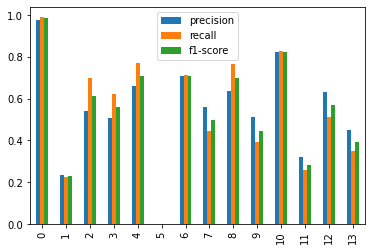

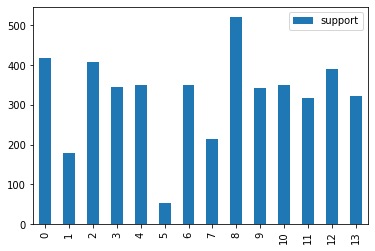

In [10]:
model8=BaggingClassifier()
model8.fit(np.array(xtrain),np.array(ytrain))
pickle.dump(model8, open('/content/drive/MyDrive/BaggingClass', 'wb'))
print('Accuracy for BaggingClass is : ',model8.score(np.array(xtest),np.array(ytest)))
print('\n')

print('Report for BaggingClass:\n')
preds=model8.predict(np.array(xtest))
x8=classification_report(ytest,preds,output_dict=True)
x8n=classification_report(np.array(ytest),preds)

print(x8n)

import pandas as pd
from IPython import display
display.display(pd.DataFrame(x8))
df = pd.DataFrame(x8)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model9=GradientBoostingClassifier()
model9.fit(np.array(xtrain),np.array(ytrain))


GradientBoostingClassifier()

In [ ]:
pickle.dump(model9, open('/content/drive/MyDrive/GradientBoost', 'wb'))
print('Accuracy for GradientBoost is : ',model9.score(np.array(xtest),np.array(ytest)))

Accuracy for GradientBoost is :  0.7098047817503839


Report for GradientBoosting:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       417
           1       0.45      0.23      0.31       179
           2       0.68      0.72      0.70       407
           3       0.58      0.69      0.63       345
           4       0.86      0.89      0.87       350
           5       0.62      0.15      0.24        53
           6       0.79      0.85      0.82       350
           7       0.65      0.47      0.55       215
           8       0.67      0.83      0.74       521
           9       0.51      0.41      0.45       342
          10       0.90      0.92      0.91       350
          11       0.45      0.46      0.45       316
          12       0.83      0.70      0.76       391
          13       0.59      0.69      0.64       323

    accuracy                           0.71      4559
   macro avg       0.68      0.64      0.65      4559
weighted avg       0.71      0.71      0.70      4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.988038,0.446809,0.682984,0.577295,0.863510,0.615385,0.786280,0.651613,0.673981,0.505376,0.899441,0.451411,0.829268,0.593085,0.709805,0.683177,0.705531
recall,0.990408,0.234637,0.719902,0.692754,0.885714,0.150943,0.851429,0.469767,0.825336,0.412281,0.920000,0.455696,0.695652,0.690402,0.709805,0.642494,0.709805
f1-score,0.989222,0.307692,0.700957,0.629776,0.874471,0.242424,0.817558,0.545946,0.742019,0.454106,0.909605,0.453543,0.756606,0.638054,0.709805,0.647284,0.701488
support,417.000000,179.000000,407.000000,345.000000,350.000000,53.000000,350.000000,215.000000,521.000000,342.000000,350.000000,316.000000,391.000000,323.000000,0.709805,4559.000000,4559.000000


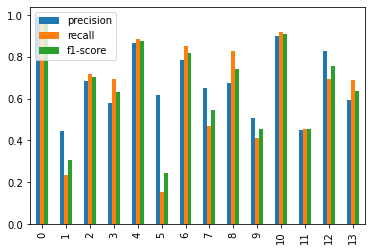

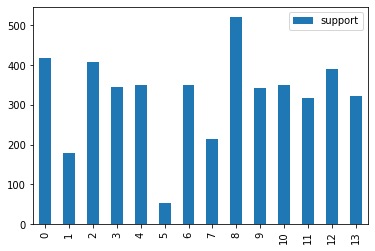

In [ ]:

print('Report for GradientBoosting:\n')
preds=model9.predict(np.array(xtest))
x9=classification_report(ytest,preds,output_dict=True)
x9n=classification_report(np.array(ytest),preds)

print(x9n)
import pandas as pd
from IPython import display
display.display(pd.DataFrame(x9))
df = pd.DataFrame(x9)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

-----------Plot For SVC-------------


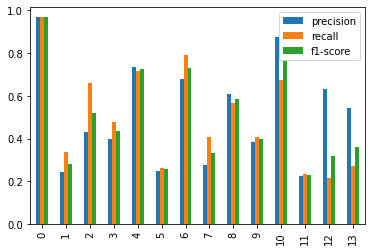

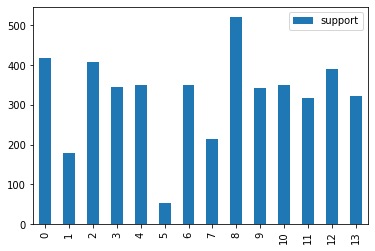



-----------Plot For RandomForest-------------


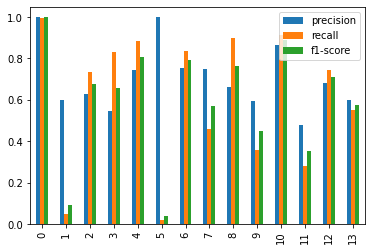

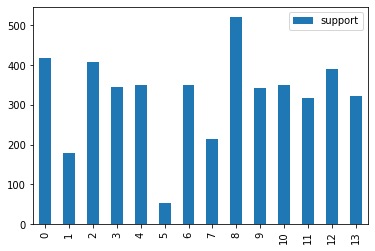



-----------Plot For KNN-------------


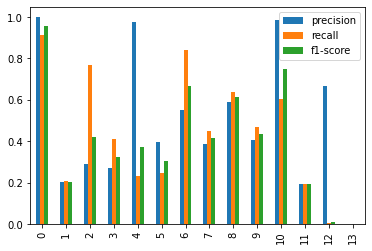

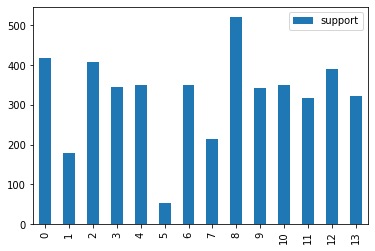



-----------Plot For ExtraTree-------------


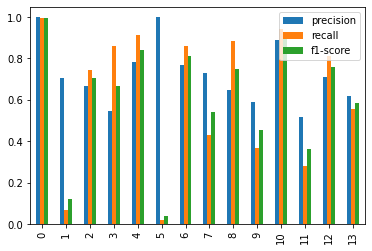

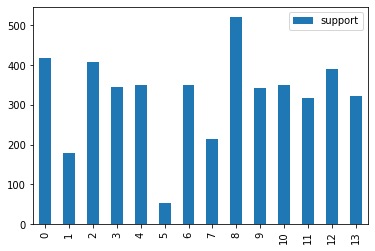



-----------Plot For DecisionTreeClassifier-------------


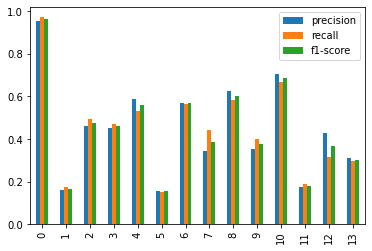

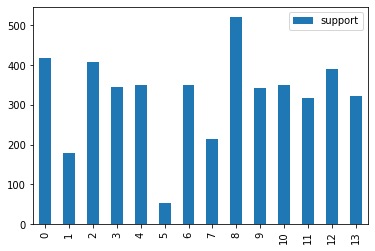



-----------Plot For GaussianNB-------------


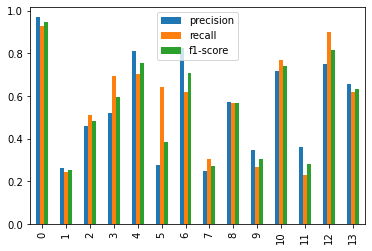

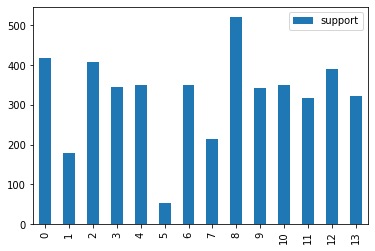



-----------Plot For BaggingClassifier-------------


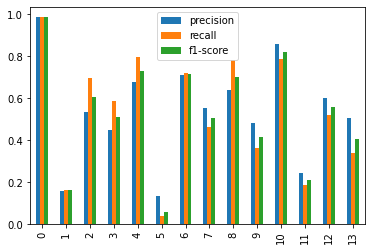

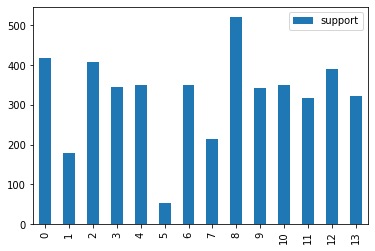



-----------Plot For GradientBoostingClassifier-------------


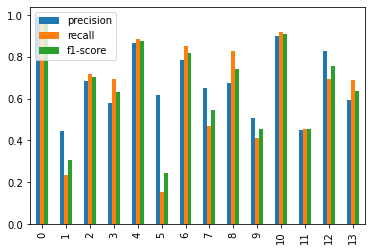

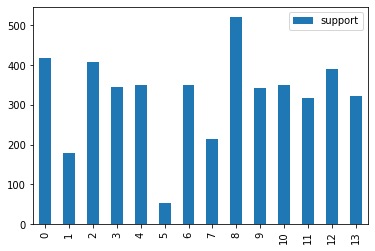

In [ ]:
print("-----------Plot For SVC-------------")
import pandas as pd
from IPython import display
#display.display(pd.DataFrame(x))
df = pd.DataFrame(x)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

print("\n")

print("-----------Plot For RandomForest-------------")
import pandas as pd
from IPython import display
#display.display(pd.DataFrame(x2))
df = pd.DataFrame(x2)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

print("\n")

print("-----------Plot For KNN-------------")


import pandas as pd
from IPython import display
#display.display(pd.DataFrame(x3))
df = pd.DataFrame(x3)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()


print("\n")

print("-----------Plot For ExtraTree-------------")


import pandas as pd
from IPython import display
df = pd.DataFrame(x4)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

print("\n")

print("-----------Plot For DecisionTreeClassifier-------------")

import pandas as pd
from IPython import display
df = pd.DataFrame(x5)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()


print("\n")

print("-----------Plot For GaussianNB-------------")

import pandas as pd
from IPython import display
df = pd.DataFrame(x7)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()


print("\n")

print("-----------Plot For BaggingClassifier-------------")

import pandas as pd
from IPython import display
df = pd.DataFrame(x8)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()





print("\n")

print("-----------Plot For GradientBoostingClassifier-------------")

import pandas as pd
from IPython import display
df = pd.DataFrame(x9)
df.iloc[:3, :14].T.plot(kind='bar')
plt.show()
df.iloc[3:4, :14].T.plot(kind='bar')
plt.show()

